In [1]:
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tagged=[[("a,",2),("b",3)],[("a,",2),("b",3)]]

In [3]:
for i in range(len(tagged)):
    for j in tagged[i]:
        if j[1]==3:
            print(j[0])
    break

b


In [4]:
#VALORES INICIALES
po = 4 #Número de individuos por población
pm = 0.35 #Probabilidad de mutación
pc = 0.9 #Probabilidad de cruzamiento
GenMax = 50 #Número de generaciones máx

In [5]:
#Matriz con la distancia entre las ciudad 
n = 5 #número de ciudades
dist = 1000 #distancia máxima entre ciudades
A = np.random.randint(10,dist, size=(n, n))
np.fill_diagonal(A, 0)
A

array([[  0, 174, 856, 908, 571],
       [205,   0, 144, 694, 776],
       [685, 897,   0, 740, 277],
       [823, 492, 867,   0,  78],
       [726, 690, 511, 155,   0]])

In [6]:
#Función de la creación de la población inicial
def matriz_solucion(n,po):
    for i in range(po):
        vec_sol = np.arange(n) #Debe de tener una longitud del número de ciudades
        np.random.shuffle(vec_sol) #Desordenamos el vector
        if i == 0:
            mat_pob = vec_sol.copy()
        else:
            mat_pob = np.vstack([mat_pob, vec_sol])
    return mat_pob

In [7]:
mat_pob = matriz_solucion(n,4)
mat_pob

array([[0, 3, 1, 4, 2],
       [1, 4, 0, 3, 2],
       [0, 1, 3, 4, 2],
       [2, 4, 0, 3, 1]])

In [8]:
#Función del calculo de la distancia recorrida por el vector solución
def distancia_recorrida(mat_pob):
    distancias=[]
    for k in range(len(mat_pob)):
        vec_sol = mat_pob[k]
        distancia=0
        for i in range(len(vec_sol)-1): #distancias entre la ciudad inicial hasta la ciudad n
            distancia = distancia + A[vec_sol[i],vec_sol[i+1]]
        distancia = distancia + A[vec_sol[-1],vec_sol[0]] #Suma de la distancia entre la última ciudad y la ciudad inicial
        distancias.append(distancia)
    return distancias

In [9]:
dist_pob = distancia_recorrida(mat_pob)
dist_pob

[3372, 4174, 2142, 2547]

In [10]:
#Guardamos la mejor solución de la población
Max_sol_fitness = mat_pob[np.argmin(np.array(dist_pob))]
Max_sol_fitness

array([0, 1, 3, 4, 2])

In [11]:
# Función para la selección de padres por torneo
def seleccion_padres(mp,fp):
    fp2 = fp.copy()
    padre1= mp[np.argmax(fp2)]
    fp2[np.argmax(fp2)]= 0
    padre2 = mp[np.argmax(fp2)]
    return padre1, padre2

In [12]:
def cruzamiento(padre1,padre2): # Position-based Crossover
    def cruzamiento_(padre1,padre2):
        valores_P1 = np.random.choice(padre1, np.random.randint(1,len(padre1)), replace=False)
        hijo1 = np.zeros(len(padre1))
        P2 = padre2.copy()
        for i in valores_P1:
            indice = np.where(padre1 == i)
            hijo1[indice[0][0]] = i
            P2[np.where(padre2 == i)]=-1
        for j in P2:
            if j!=-1:
                hijo1[np.argmin(hijo1)]=j
        return hijo1
        
    hijo1 = cruzamiento_(padre1,padre2)
    hijo2 = cruzamiento_(padre2,padre1)
    
    return hijo1,hijo2

In [13]:
def mutacion(hijo1, hijo2,pm):
    def SWAP(vec_sol):
        #Implementación del SWAP
        vec_sol2 = vec_sol.copy()
        swap = np.random.choice(vec_sol2, 2, replace=False)
        ciudad1 = swap[0]
        ciudad2 = swap[1]
        ind_c1 = np.where(vec_sol2 == ciudad1)
        ind_c2 = np.where(vec_sol2 == ciudad2)

        #Intercambio de ciudades
        vec_sol2[ind_c1] = ciudad2
        vec_sol2[ind_c2] = ciudad1
        return vec_sol2

    if np.random.rand(1) < pm:
        hijo1 = SWAP(hijo1)
    if np.random.rand(1) < pm:
        hijo2 = SWAP(hijo2)
    
    return hijo1,hijo2

In [14]:
#Función de reemplazo - Determinista, se reemplazan los n peores
def reemplazo(mp,fp,hijo1,hijo2):
    mp2 = mp.copy()
    fp2 = fp.copy()
    mp2[np.argmin(fp2)] = hijo1
    fp2[np.argmin(fp2)]= np.max(fp2)
    mp2[np.argmin(fp2)] = hijo2
    return mp2  

In [15]:
#Función de reemplazo - Determinista, reemplazaremos al mejor y al peor 
def reemplazo2(mp,fp,hijo1,hijo2):
    mp2 = mp.copy()
    fp2 = fp.copy()
    mp2[np.argmin(fp2)] = hijo1
    mp2[np.argmax(fp2)] = hijo2
    return mp2

In [16]:
#VALORES INICIALES
po = 4 #Número de individuos por población
pm = 0.01 #Probabilidad de mutación
pc = 0.9 #Probabilidad de cruzamiento
GenMax = 250 #Número de generaciones máx

#Matriz con la distancia entre las ciudad 
n = 100 #número de ciudades
dist = 1000 #distancia máxima entre ciudades
A = np.random.randint(10,dist, size=(n, n))
np.fill_diagonal(A, 0)
A

array([[  0, 498,  67, ..., 425,  96, 770],
       [772,   0, 341, ..., 593, 802, 446],
       [868, 124,   0, ..., 771, 461,  79],
       ...,
       [898, 301, 770, ...,   0, 741, 825],
       [353, 271, 333, ..., 206,   0, 323],
       [679, 968, 109, ..., 245, 990,   0]])

In [17]:
mat_pob = matriz_solucion(n,po)
dist_pob = distancia_recorrida(mat_pob)
print(mat_pob)
print(dist_pob)
#Guardamos la mejor solución de la población
Max_sol_fitness = mat_pob[np.argmin(np.array(dist_pob))]
Max_sol_fitness

[[14 82 22 48 68 34  1 69 87 71 40 53 16 60 18 75 81 50 74 27 66 88 10 58
  62 23 54  4 95  7  9 63 96 17 76  0 52  2 21 97  3 84 93 30 92 94 41 35
  11 39 36 56  6 70 55 26 89 25 24 33 57 13 47 61 31 59 65  5 67 80 44 49
  38 98 83 86 91 43 29 64 12 15 20 46 32 78 79 28 45 72 90 85  8 42 73 51
  19 99 77 37]
 [27 86  4 25 42 15 21 67 94 95 59 50 37 41 13 69 54 53 88 48 44 92 99 58
  76 89 24 40 73 91 31 96 20  6 97  5 87 82 14 26 47 49 22 51 64 83 71 34
   2 32 33 55 84 85  3 16 11 74 60  9 43 81 10 90 23 77 35 19 18 61  1 68
  98 93 65 79 70  0  7 72 80 17 75 52 28 36 56 29 78 63 46 30 62  8 57 38
  66 12 39 45]
 [93 84 40 82 22 44 24 67 70 60 87 95  1  2 15 35 32 29  7 52 99 12 91 41
   0 94 28  8 13 57  3 63 96 18 33 73 42  4 92 11 23 88 38 83 56 78 54 53
  85 81 58 49 43 66 37 77 30 31 71 72 14 59 61 97 75 25 17 39 62 86 90 20
  80 64 89 34  6 48 16 98 46 10  5 76 19 51 69 68 50 55 45 27 26  9 21 36
  65 79 47 74]
 [78 77 75 22 47 21 71 76 46 56 74 58 28  8 38 66 73 52 82 57 34 85

array([14, 82, 22, 48, 68, 34,  1, 69, 87, 71, 40, 53, 16, 60, 18, 75, 81,
       50, 74, 27, 66, 88, 10, 58, 62, 23, 54,  4, 95,  7,  9, 63, 96, 17,
       76,  0, 52,  2, 21, 97,  3, 84, 93, 30, 92, 94, 41, 35, 11, 39, 36,
       56,  6, 70, 55, 26, 89, 25, 24, 33, 57, 13, 47, 61, 31, 59, 65,  5,
       67, 80, 44, 49, 38, 98, 83, 86, 91, 43, 29, 64, 12, 15, 20, 46, 32,
       78, 79, 28, 45, 72, 90, 85,  8, 42, 73, 51, 19, 99, 77, 37])

In [18]:
lista_max_sol_fitness = [min(dist_pob)]
lista_mejor_poblacion_actual=[min(dist_pob)]

for k in range(GenMax):
    rcruzamiento = np.random.rand(1)
    if rcruzamiento < pc:
        padre1, padre2 = seleccion_padres(mat_pob,dist_pob) #seleccion de padres
        hijo1, hijo2 = cruzamiento(padre1,padre2) #cruzamiento
        hijo1, hijo2 = mutacion(hijo1, hijo2,pm) #mutación de los hijos
        mat_pob = reemplazo(mat_pob,dist_pob,hijo1,hijo2) #Reemplazo en la población
        
        fitness_pob = distancia_recorrida(mat_pob)
        lista_mejor_poblacion_actual.append(min(fitness_pob))
        if min(fitness_pob) < min(dist_pob):
            Max_sol_fitness = mat_pob[np.argmin(np.array(dist_pob))]
            dist_pob = fitness_pob.copy()
            lista_max_sol_fitness.append(min(dist_pob))

In [19]:
lista_max_sol_fitness

[47024, 45756, 43953]

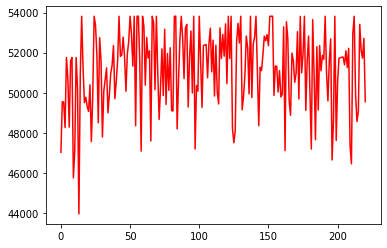

In [20]:
plt.plot(lista_mejor_poblacion_actual,color="red") #Todas las distancias
#plt.plot(range(len(lista_max_sol_fitness)),lista_max_sol_fitness,color="blue") #Las mejores distancias

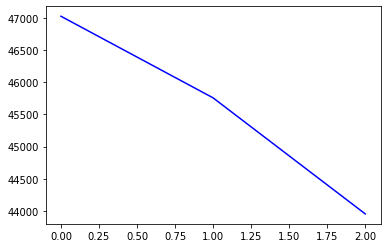

In [21]:
plt.plot(lista_max_sol_fitness,color="blue") #Las mejores distancias

In [22]:
min(fitness_pob)

50707